In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sns.set_context("talk")
#SS
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir= thisDir + 'output/'
subDir=outDir+'subNetwork/'
netList=['default', 'visual','fp','dan','van','salience','co','sm','auditory','pmn','pon']
netRoi=dict([('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])

In [2]:
SS=pd.DataFrame()
DS=pd.DataFrame()
CV=pd.DataFrame()
BS=pd.DataFrame()
for i in netList:
    """
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/SS/acc.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    #SVC['Train.Test']=SVC['train_task']+'.'+SVC['test_task']
    #SVC.drop(columns=['train_task', 'test_task'], inplace=True)
    log=pd.read_csv(outDir+i+'/results/logReg/acc/SS/acc.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    #log['Train.Test']=log['train_task']+'.'+log['test_task']
    #log.drop(columns=['train_task', 'test_task'], inplace=True)
    """
    tmpSS=pd.read_csv(subDir+i+'/results/Ridge/acc/SS/acc.csv')
    #tmpSS['Analysis']='ridge'
    tmpSS['Network']=i
    tmpSS['Features']=netRoi[i]
    #classifiers=[SVC, log, ridge]
    #sub_df = pd.concat(classifiers)
    #SS=pd.concat([SS,sub_df])
    SS=pd.concat([SS,tmpSS])
    
    tmpDS=pd.read_csv(subDir+i+'/results/Ridge/acc/DS/acc.csv')
    #tmpDS['Analysis']='ridge'
    tmpDS['Network']=i
    tmpDS['Features']=netRoi[i]
    DS=pd.concat([DS,tmpDS])
    
    tmpBS=pd.read_csv(subDir+i+'/results/Ridge/acc/BS/acc.csv')
    #tmpBS['Analysis']='ridge'
    tmpBS['Network']=i
    tmpBS['Features']=netRoi[i]
    BS=pd.concat([BS,tmpBS])
    
    tmpCV=pd.read_csv(subDir+i+'/results/Ridge/acc/CV/acc.csv')
    #tmpCV['Analysis']='ridge'
    tmpCV=tmpCV.melt(id_vars='sub', value_vars=['mixed', 'motor','mem'], var_name='Task', value_name='Accuracy')
    tmpCV['Network']=i
    tmpCV['Features']=netRoi[i]
    CV=pd.concat([CV,tmpCV])
    
    
SS.drop(columns='Unnamed: 0', inplace=True)
DS.drop(columns='Unnamed: 0', inplace=True)
BS.drop(columns='Unnamed: 0', inplace=True)
CV.rename(columns={'Accuracy':'acc'},inplace=True)

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.stripplot(x="Network", y="acc",data=SS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'images/ridge_SS.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.stripplot(x="Network", y="acc",data=DS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'images/ridge_DS.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.stripplot(x="Network", y="acc",data=BS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'images/ridge_BS.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.stripplot(x="Network", y="Accuracy",data=CV,order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
#ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'images/ridge_CV.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.stripplot(x="Network", y="Accuracy",hue='sub',data=CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
#ax.set(ylim=(0, 1))
#ax.axhline(.50, ls='--', color='r')

In [ ]:
df=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/SS/stats.csv', usecols=[1, 2, 3])
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    #SVC['Train.Test']=SVC['train_task']+'.'+SVC['test_task']
    #SVC.drop(columns=['train_task', 'test_task'], inplace=True)
    log=pd.read_csv(outDir+i+'/results/logReg/acc/SS/stats.csv', usecols=[1, 2, 3])
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    #log['Train.Test']=log['train_task']+'.'+log['test_task']
    #log.drop(columns=['train_task', 'test_task'], inplace=True)
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    #ridge['Train.Test']=ridge['train_task']+'.'+ridge['test_task']
    #ridge.drop(columns=['train_task', 'test_task'], inplace=True)
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    df=pd.concat([df,sub_df])

plt.figure(figsize=(12,6))
ax = sns.stripplot(x="Network", y="Mean",data=df)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'SS.png', bbox_inches='tight')

In [ ]:
#CV
CV=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/CV/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/CV/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    CV=pd.concat([CV,sub_df])

CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

plt.figure(figsize=(12,6))
ax = sns.stripplot(x="Network", y="Mean",data=CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(.5, 1))
plt.savefig(outDir +'CV.png', bbox_inches='tight')

In [ ]:
#DS
DS=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/DS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/DS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    DS=pd.concat([DS,sub_df])

plt.figure(figsize=(12,6))
ax = sns.stripplot(x="Network", y="Mean",data=DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
#ax.set(ylim=(top= 1))
ax.set_ylim(top=1)
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'DS.png', bbox_inches='tight')

In [ ]:
#BS
BS=pd.DataFrame()
for i in netList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/BS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/BS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    BS=pd.concat([BS,sub_df])
BS.drop(['Unnamed: 0'], axis=1, inplace=True)

plt.figure(figsize=(12,6))
ax = sns.stripplot(x="Network", y="Mean",data=BS)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set_ylim(top=1)
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'BS.png', bbox_inches='tight')

In [ ]:
CV=pd.DataFrame()
subList=['co', 'fp', 'fp_co']
for i in subList: 
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/CV/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/CV/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    CV=pd.concat([CV,sub_df])
CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_fpCO.png', bbox_inches='tight')

In [ ]:
#SS
SS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/SS/stats.csv', usecols=[1, 2, 3])
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    #SVC['Train.Test']=SVC['train_task']+'.'+SVC['test_task']
    #SVC.drop(columns=['train_task', 'test_task'], inplace=True)
    log=pd.read_csv(outDir+i+'/results/logReg/acc/SS/stats.csv', usecols=[1, 2, 3])
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    #log['Train.Test']=log['train_task']+'.'+log['test_task']
    #log.drop(columns=['train_task', 'test_task'], inplace=True)
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    #ridge['Train.Test']=ridge['train_task']+'.'+ridge['test_task']
    #ridge.drop(columns=['train_task', 'test_task'], inplace=True)
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    SS=pd.concat([SS,sub_df])

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_fpCO.png', bbox_inches='tight')

In [ ]:
#BS
BS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/BS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/BS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    BS=pd.concat([BS,sub_df])
BS.drop(['Unnamed: 0'], axis=1, inplace=True)

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=BS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'BS_fpCO.png', bbox_inches='tight')

In [ ]:
#DS
DS=pd.DataFrame()
for i in subList:
    SVC=pd.read_csv(outDir+i+'/results/SVC/acc/DS/stats.csv')
    SVC['Analysis']='SVC'
    SVC['Network']=i
    #SVC['Features']=netRoi[i]
    log=pd.read_csv(outDir+i+'/results/logReg/acc/DS/stats.csv')
    log['Analysis']='log'
    log['Network']=i
    #log['Features']=netRoi[i]
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Analysis']='ridge'
    ridge['Network']=i
    #ridge['Features']=netRoi[i]
    classifiers=[SVC, log, ridge]
    sub_df = pd.concat(classifiers)
    DS=pd.concat([DS,sub_df])

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="Network", y="Mean",data=DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'DS_fpCO.png', bbox_inches='tight')

In [ ]:
#Ridge only 
#CV
R_CV=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/CV/stats.csv')
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_CV=pd.concat([R_CV,ridge])
R_CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)

#SS
R_SS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/SS/stats.csv', usecols=[1, 2, 3])
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_SS=pd.concat([R_SS,ridge])

#DS
R_DS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/DS/stats.csv')
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_DS=pd.concat([R_DS,ridge])
    
#BS
R_BS=pd.DataFrame()
for i in netList:
    ridge=pd.read_csv(outDir+i+'/results/Ridge/acc/BS/stats.csv', usecols=[1, 2, 3,4])
    ridge['Network']=i
    ridge['Features']=netRoi[i]
    R_BS=pd.concat([R_BS,ridge])
    

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue='Task',hue_order=['mem','motor','mixed'],data=R_CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_Ridge.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_Ridge.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="task", hue_order=['mem','motor','mixed'],data=R_DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'DS_Ridge.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Network", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_BS)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'BS_Ridge.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue='Task',hue_order=['mem','motor','mixed'],data=R_CV)
ax.set_title('Cross Validation')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'CV_feat.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_SS)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
plt.savefig(outDir +'SS_feat.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="task", hue_order=['mem','motor','mixed'],data=R_DS)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'DS_feat.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x="Features", y="Mean",hue="train_task",hue_order=['mem','motor','mixed'],data=R_BS)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.axhline(.50, ls='--', color='r')
plt.savefig(outDir +'BS_feat.png', bbox_inches='tight')

In [ ]:
#subblocks
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir= thisDir + 'output/subNetwork/subBlock'
CV=pd.DataFrame()
SS=pd.DataFrame()
DS=pd.DataFrame()
BS=pd.DataFrame()
modelList=['SVC','logReg','Ridge']
for i in modelList:
    tmp_SS=pd.read_csv(outDir+'/results/'+i+'/acc/SS/stats.csv', usecols=[1, 2, 3])
    tmp_SS['Analysis']=i
    SS=pd.concat([SS,tmp_SS])
    
    tmp_CV=pd.read_csv(outDir+'/results/'+i+'/acc/CV/stats.csv')
    tmp_CV['Analysis']=i
    CV=pd.concat([CV,tmp_CV])

    
    tmp_DS=pd.read_csv(outDir+'/results/'+i+'/acc/DS/stats.csv')
    tmp_DS['Analysis']=i
    DS=pd.concat([DS,tmp_DS])
    
    tmp_BS=pd.read_csv(outDir+'/results/'+i+'/acc/BS/stats.csv')
    tmp_BS['Analysis']=i
    BS=pd.concat([BS,tmp_BS])

CV.rename(columns={"Unnamed: 0": "Task"}, inplace=True)
BS.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot('Analysis', 'Mean', hue='Task', data=CV)
ax.set(ylim=(.9, 1))
ax.set_ylabel('Performance(%)')
ax.set_title('Cross Validation Across Models Using Blocks')
ax.legend(title='Task',loc='lower right')
plt.savefig(outDir +'Block_CV.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context("talk")
ax=sns.boxplot('Analysis', 'acc', hue='task', data=result)
ax.set(ylim=(.3, 1.03))
ax.axhline(.50, ls='--', color='r')
ax.set_title('Different Subject Same Task Across Models')
ax.legend(title='Task',loc='lower left')
ax.set_ylabel('Accuracy')

In [ ]:
import results

results.ds_boxplot()
#results.bs_boxplot()
#results.ss_boxplot()
#results.cv_modelComp()

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Network", y="acc",data=SS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')



In [ ]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Network", y="acc",data=DS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Network", y="acc",data=BS, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Network", y="Accuracy",data=CV, order=['default','visual','dan','fp','co','van','sm','auditory','salience','pmn','pon'])
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(0, 1))
ax.axhline(.50, ls='--', color='r')

In [8]:
#subnet overlap with random feautre selection

rand_CV=pd.read_csv(outDir+'randomIdx/results/ridge/acc/CV/all.csv', usecols=[1,2,3])
rand_SS=pd.read_csv(outDir+'randomIdx/results/ridge/acc/SS/all.csv',usecols=[1,2,3,4,5])
rand_DS=pd.read_csv(outDir+'randomIdx/results/ridge/acc/DS/all.csv',usecols=[1,2,3,4,5])
rand_BS=pd.read_csv(outDir+'randomIdx/results/ridge/acc/BS/all.csv',usecols=[1,2,3,4,5,6])



#netRoi
accDict=dict()
def accMean(network,df):
    tmp=df[(df['Network']==network)].acc.values
    acc=tmp.mean()
    accDict[network] = acc
    return accDict

In [9]:
feature=[10824,8736, 4620,5264,3151, 484, 4060, 2375, 564,45,21]
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_context("talk")
for i in netList:
    #SS
    #SSDict=accMean(i, SS)
    #CV
    #CVDict=accMean(i, CV)
    #BS
    #BSDict=accMean(i, BS)
    #DS
    DSDict=accMean(i, DS)
"""
#SS
SS_mu= pd.DataFrame(list(SSDict.items()), index=['a', 'b', 'c', 'd','e','f','g','h','i','j','k'], columns=['Network','acc'])
SS_mu['features']=feature

#CV
CV_mu= pd.DataFrame(list(CVDict.items()), index=['a', 'b', 'c', 'd','e','f','g','h','i','j','k'], columns=['Network','acc'])
CV_mu['features']=feature
#BS

BS_mu= pd.DataFrame(list(BSDict.items()), index=['a', 'b', 'c', 'd','e','f','g','h','i','j','k'], columns=['Network','acc'])
BS_mu['features']=feature
#DS
"""
DS_mu= pd.DataFrame(list(DSDict.items()), index=['a', 'b', 'c', 'd','e','f','g','h','i','j','k'], columns=['Network','acc'])
DS_mu['features']=feature


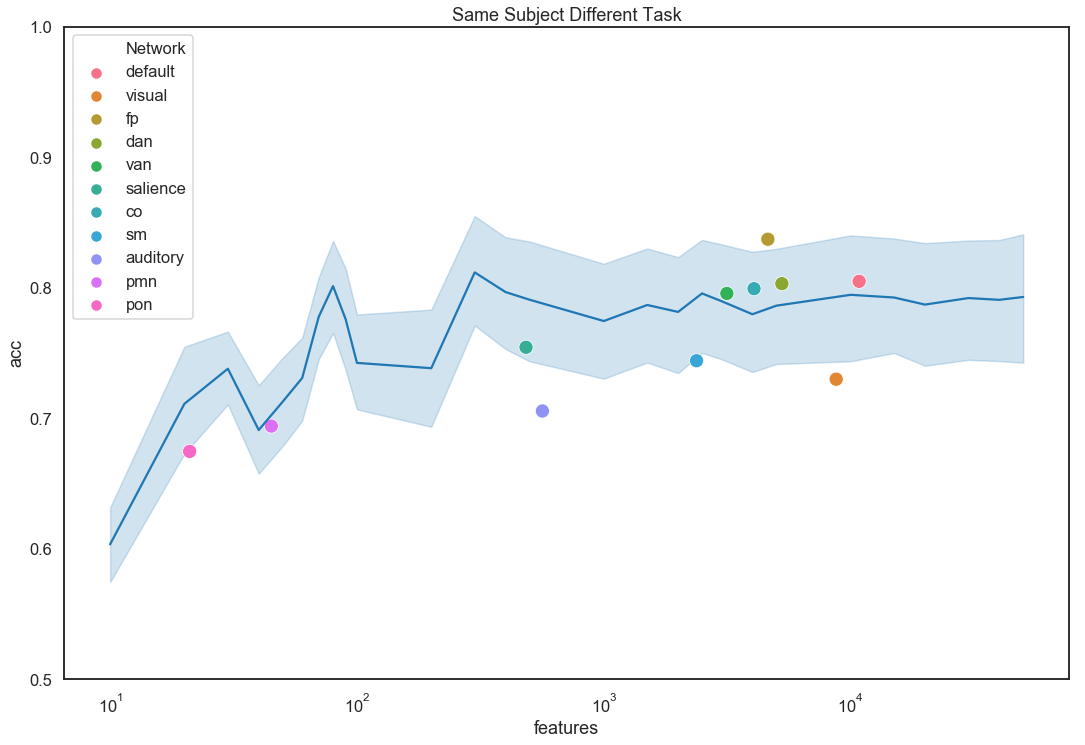

In [12]:


fig, ax = plt.subplots(figsize=(18,12))
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax)
ax.set_title('Same Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(.5, 1))
ax.set(xscale="log")
#ax2 = ax.twinx()
g=sns.scatterplot(x='features', y='acc', hue='Network', data=SS_mu, ax=ax, color='r', s=200)
g.legend(loc='upper left')
plt.savefig(outDir +'subNetwork/images/ridge_SSrand_net.png', bbox_inches='tight')

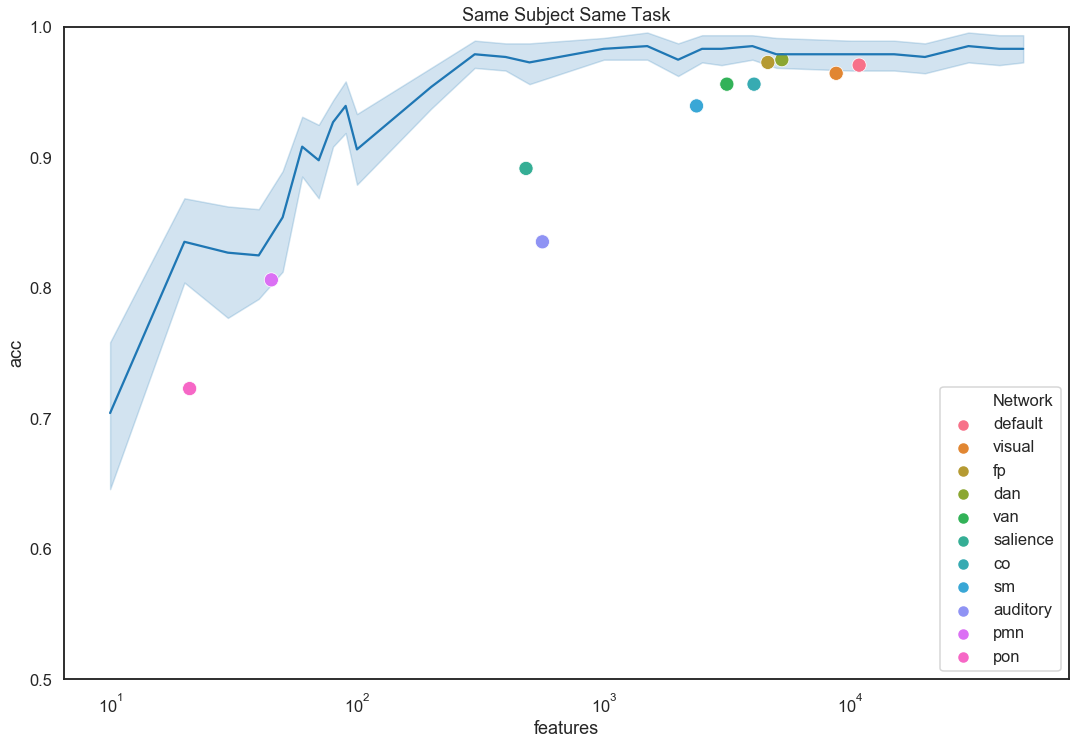

In [15]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax)
ax.set_title('Same Subject Same Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(.5, 1))
ax.set(xscale="log")
#ax2 = ax.twinx()
g=sns.scatterplot(x='features', y='acc', hue='Network', data=CV_mu, ax=ax, color='r',s=200)
g.legend(loc='lower right')
plt.savefig(outDir +'subNetwork/images/ridge_CVrand_net.png', bbox_inches='tight')

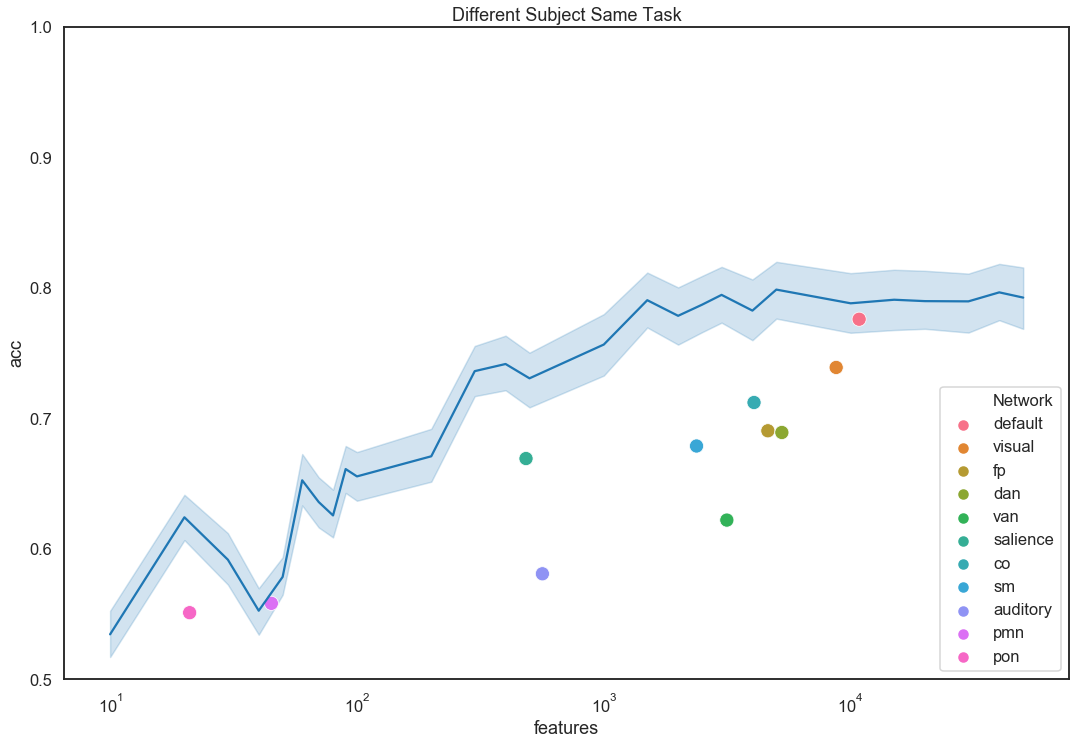

In [10]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax)
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(.5, 1))
ax.set(xscale="log")
#ax2 = ax.twinx()
g=sns.scatterplot(x='features', y='acc', hue='Network', data=DS_mu, ax=ax, color='r', s=200)
g.legend(loc='lower right')
plt.savefig(outDir +'subNetwork/images/ridge_DSrand_net.png', bbox_inches='tight')

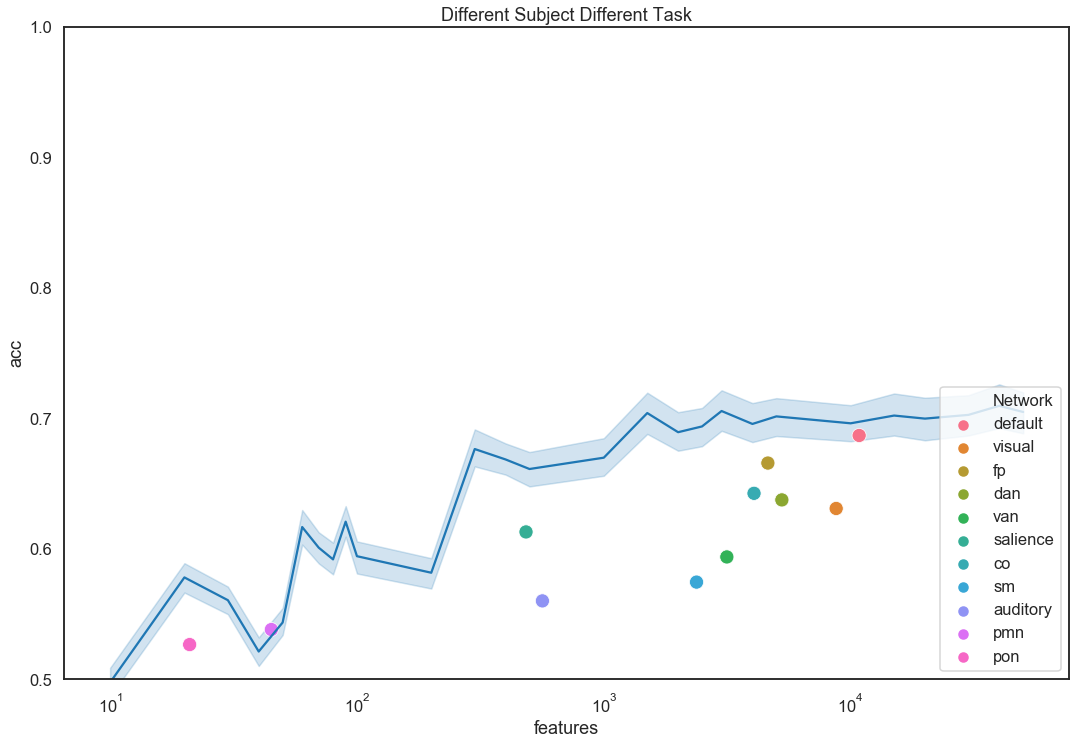

In [7]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax)
ax.set_title('Different Subject Different Task')
ax.set_ylabel('Performance(%)')
ax.set(ylim=(.5, 1))
ax.set(xscale="log")
#ax2 = ax.twinx()
g=sns.scatterplot(x='features', y='acc', hue='Network', data=BS_mu, ax=ax, color='r', s=200)
g.legend(loc='lower right')
plt.savefig(outDir +'subNetwork/images/ridge_BSrand_net.png', bbox_inches='tight')
